# Avocados Type Detection

## Table of Contents
<ul>
<li><a href="#statement">Problem Statement</a></li>
<li><a href="#loading">Data loading and Description</a></li>
<li><a href="#profiling">Data Profiling</a></li>
<li><a href="#models and evaluation">Models for Prediction</a></li>
<li><a href="#prediction">Prediction</a></li>
</ul>

<a id='statement'></a>
## Problem Statement

Are Avocados organic or not ??

<a id='loading'></a>
## Data loading and Description

#### Importing packages and loading data  

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, average_precision_score,precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

av_data = pd.read_csv('C:\\avocado.csv')

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<a id='profiling'></a>
## Data Profiling

#### Understanding data

In [2]:
av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Check on missing values

In [3]:
av_data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Looking at the price of different types of avocados

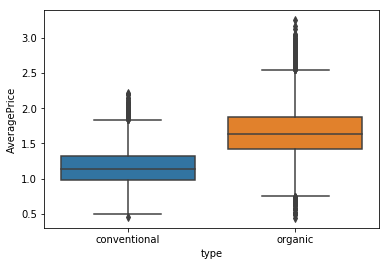

In [4]:
sns.boxplot(y="AveragePrice", x="type", data=av_data)

Organic avocados are more expensive. The way it is cultivated makes it more expensive .

Now lets look at the price of avocado in different regions each passing years for conventional avocados

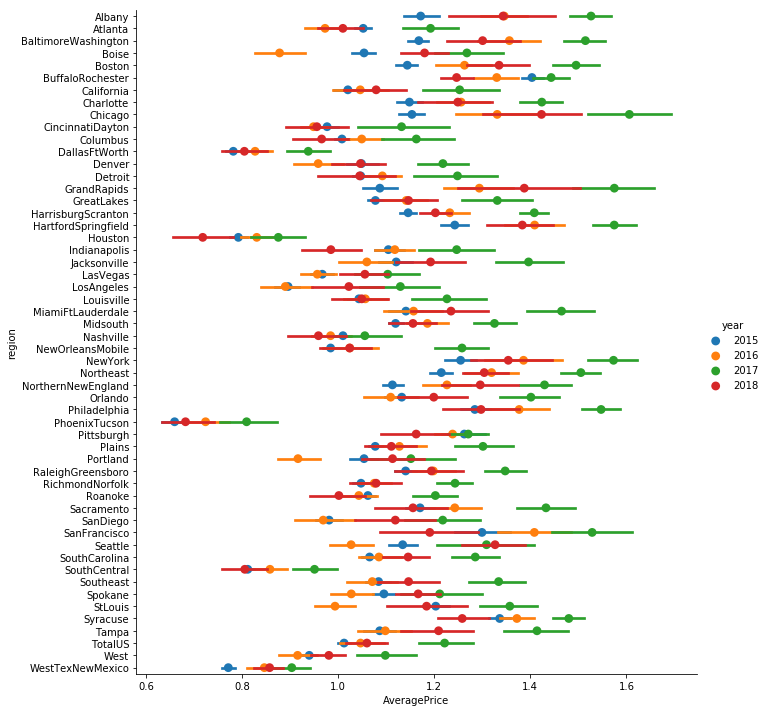

In [5]:
filter = av_data['type']=='conventional'
fp = sns.factorplot('AveragePrice','region',data=av_data[filter],
                   hue='year',
                   size=10,
                   join=False,
              )

Affect of price on organic avocados

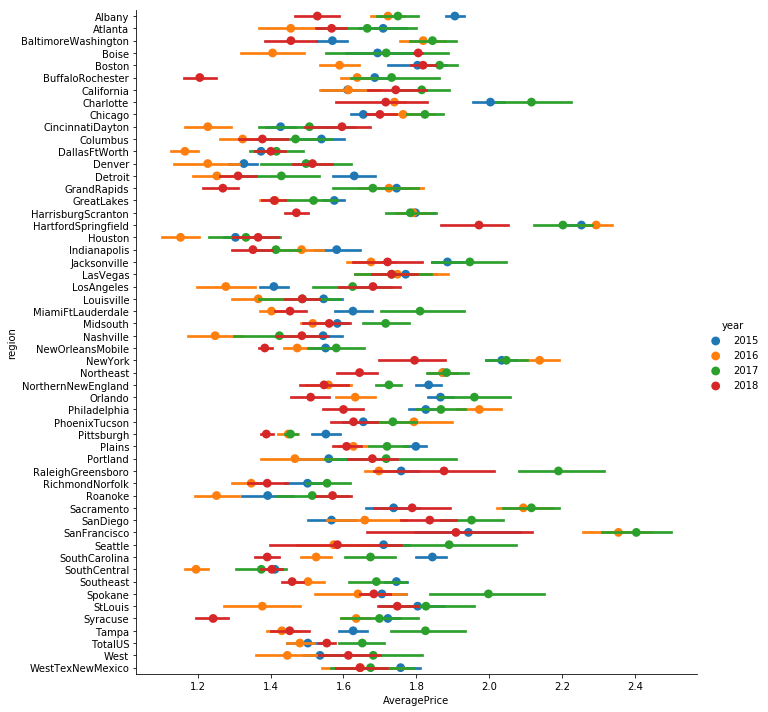

In [6]:
filter = av_data['type']=='organic'
fp = sns.factorplot('AveragePrice','region',data=av_data[filter],
                   hue='year',
                   size=10,
                   join=False,
              )

Price is higher for both the types of avocados in 2017. 
Conventional type has the lower price(Obvious) as compared to the other type.

#### Encoding to Binary format

since the price again depends on the type of avocados , will consider column 'type' as our target variable

In [7]:
# encode target variable 'type' into binary format
av_data['type'] = av_data['type'].map({'organic': 1, 'conventional': 0})

#### Bivariate Analysis - Understanding correlation 

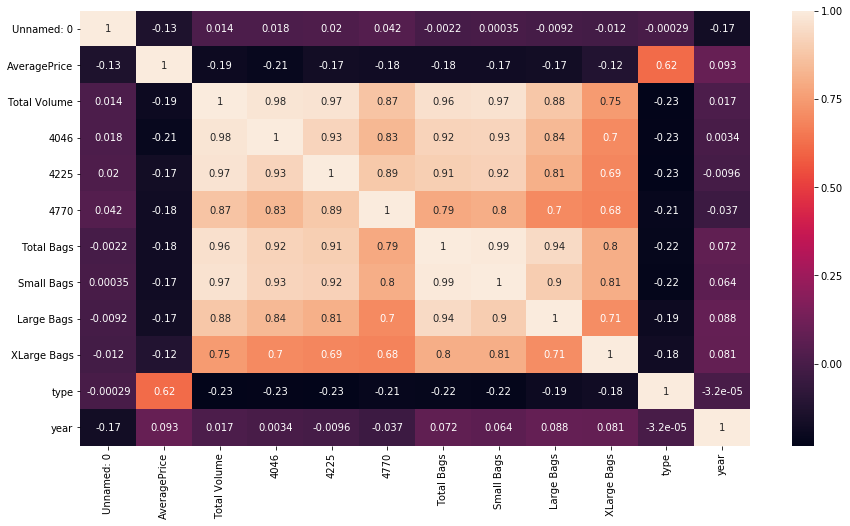

In [8]:
#Understanding Correlation 
corr = av_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

If we look at the correlation of all the features,we'll notice that Small Bags,Large Bag are strongly correlated.
Also there is a strong correlation between Total Bags and Total Volume.

#### Dropping Columns

In [9]:
av_data.drop(['Large Bags','Total Volume'], axis = 1, inplace=True)

In [10]:
#Date will definitely not impact the price of avocados
av_data.drop(['Date'], axis = 1, inplace=True)

#### Categorical Features Encoding/Dummification

- As machine learning models understand only numbers data in different formats including text and dates needs to be mapped into numbers prior to feeding to the model
- The process of changing non-numerical data into numerical is called 'Encoding'/'dummification'

In [11]:
#label = LabelEncoder()
#x["year"] = label.fit_transform(x["year"]) 
#onehotencoder = OneHotEncoder(categorical_features = [9])
#x["region"] = label.fit_transform(x["region"])
#onehotencoder = OneHotEncoder(categorical_features = [10])
#x = onehotencoder.fit_transform(x)
#y["type"] = label.fit_transform(y["type"]) 

# OR

encoded_data = pd.get_dummies(av_data)

<a id='models and evaluation'></a>
## Models For Prediction

In [12]:
x = encoded_data.drop(['type'], axis = 1)
y = encoded_data[['type']]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = .2)


#### 1. Logistic Regression and Evaluation

In [13]:
logreg =  LogisticRegression(penalty='l1', tol=0.0001).fit(x_train,y_train)

print("LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))

LogisticRegression test data score:0.997


Good result,but the values on the training and test set are about the same, which may indicate that we have understudied the model.Lets try the cross validation to train the logistic regression model.

cross validation score:0.996


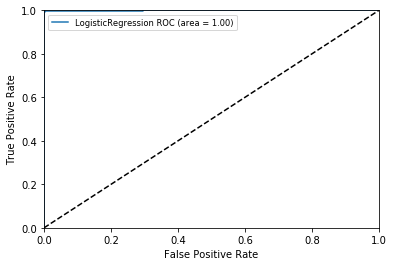

In [14]:
kfold = 7 
log_reg = LogisticRegression(penalty='l1', tol=0.001) 
scores = cross_val_score(log_reg, x, y, cv = kfold)
print("cross validation score:{:.3f}".
     format(scores.mean()))

logreg_result = log_reg.fit(x_train,y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')


#### 2. RandomForest Classifier And Evaluation

In [15]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
p_rf = rf.score(x_test,y_test)
print("Average accuracy score : {:.3f}".
     format(p_rf))

Average accuracy score : 1.000


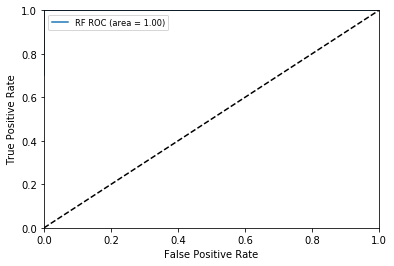

In [82]:
fpr, tpr, thresholds_rf = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RF',roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

<a id='prediction'></a>
## Prediction

- Though both the models performed well ,but RandomForestClassifier has higher accuracy compared to the the LogisticRegression model.
- Southcentral,dallasFtWorth,Houston,LosAngeles,Nasville are few of the regions where Millenial could find cheap avocados and could live out the Millenail American dream.